# The influences of the economists (influenced and have been influenced)

In [2]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter

In [148]:
query = """

PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>

SELECT DISTINCT ?economist ?name ?influencedBy ?influenced

WHERE { ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbo:nationality ?nationality .
        ?economist owl:sameAs ?sameAs .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist dbo:influencedBy ?influencedBy1 .
        BIND(STRAFTER(STR(?influencedBy1),"http://dbpedia.org/resource/") AS ?influencedBy2)
  BIND(REPLACE(STR(?influencedBy2),"[_]"," ") AS ?influencedBy3)
  BIND(REPLACE(STR(?influencedBy3),"[é]","e") AS ?influencedBy4)
  BIND(REPLACE(STR(?influencedBy4),"J. M. Keynes", "John Maynard Keynes") AS ?influencedBy)
        ?economist dbo:influenced ?influenced1 .
        BIND(STRAFTER(STR(?influenced1),"http://dbpedia.org/resource/") AS ?influenced2)
  BIND(REPLACE(STR(?influenced2),"[_]"," ") AS ?influenced3)
  BIND(REPLACE(STR(?influenced3),"[é]","e") AS ?influenced4)
  BIND(REPLACE(STR(?influenced4),"J. M. Keynes", "John Maynard Keynes") AS ?influenced)
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        FILTER (str(?influenced) != "")
        FILTER (str(?influencedBy) != "")
}
"""

In [149]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

In [150]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [151]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [152]:
# Number of rows in the result
len(rc['results']['bindings'])

692

In [153]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_Lachmann'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': ''}, 'influencedBy': {'type': 'literal', 'value': 'Ludwig von Mises'}, 'influenced': {'type': 'literal', 'value': 'Don Lavoie'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_Lachmann'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig Lachmann'}, 'influencedBy': {'type': 'literal', 'value': 'Ludwig von Mises'}, 'influenced': {'type': 'literal', 'value': 'Don Lavoie'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_Lachmann'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': ''}, 'influencedBy': {'type': 'literal', 'value': 'Ludwig von Mises'}, 'influenced': {'type': 'literal', 'value': 'Bruce Caldwell (historian of economic thought)'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_Lachmann'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'va

In [154]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        try: 
            name = l['name']['value']
            print([l['economist']['value'],name,l['influencedBy']['value'], l['influenced']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['economist']['value'],name,l['influencedBy']['value'], l['influenced']['value']])
            except :
                print([l['economist']['value'],'',l['influencedBy']['value'], l['influenced']['value']])

        i += 1

['http://dbpedia.org/resource/Ludwig_Lachmann', '', 'Ludwig von Mises', 'Don Lavoie']
['http://dbpedia.org/resource/Ludwig_Lachmann', 'Ludwig Lachmann', 'Ludwig von Mises', 'Don Lavoie']
['http://dbpedia.org/resource/Ludwig_Lachmann', '', 'Ludwig von Mises', 'Bruce Caldwell (historian of economic thought)']
['http://dbpedia.org/resource/Ludwig_Lachmann', 'Ludwig Lachmann', 'Ludwig von Mises', 'Bruce Caldwell (historian of economic thought)']
['http://dbpedia.org/resource/Ludwig_Lachmann', '', 'Alfred Schutz', 'Don Lavoie']


## The headcount of the economists who have been influenced from 1800 to the present day

In [155]:
# Explore
influencedByList = []
for l in rc['results']['bindings']:
    influencedByList.append(l['influencedBy']['value'])

In [156]:
counterInfluencedByList = Counter(influencedByList)
groupedInfluencedByList = sorted(list(zip(counterInfluencedByList.values(), counterInfluencedByList.keys())), reverse=True)

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


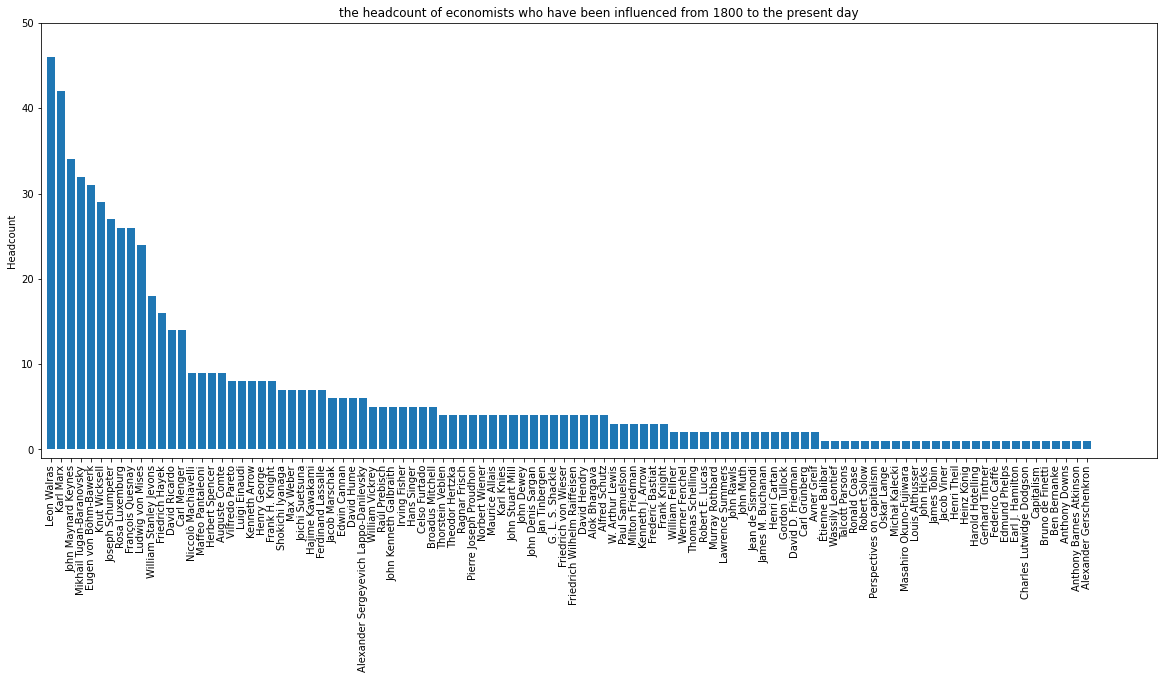

In [157]:
# Barplot
eff = [l[1] for l in groupedInfluencedByList]
objects = [l[0] for l in groupedInfluencedByList ]

p1 = plt.bar(eff, objects)

plt.ylabel('Headcount')
plt.title('the headcount of economists who have been influenced from 1800 to the present day')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=45)

p1 = plt.figure(1, [25, 8])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,110)
ax.set_ylim(-1,50)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

# One problem is that some names appear two times like Keynes.

In [158]:
bGILB=groupedInfluencedByList[:30]

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


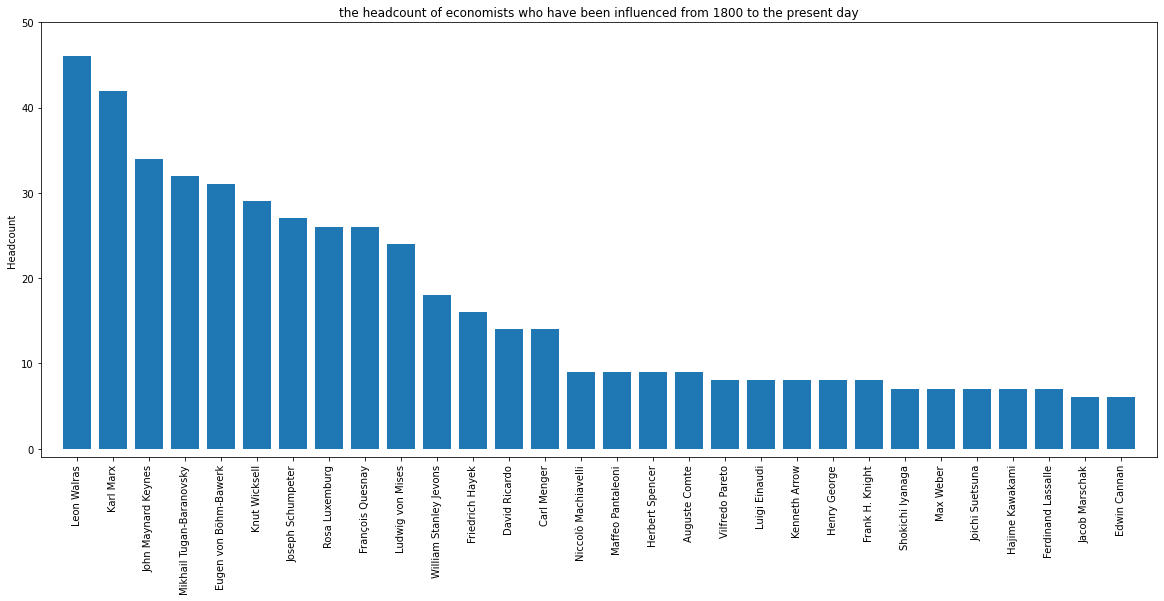

In [159]:
# Barplot of the top 30 of economists who have been influenced from 1800 to the present day
eff = [l[1] for l in bGILB]
objects = [l[0] for l in bGILB]

p1 = plt.bar(eff, objects)

plt.ylabel('Headcount')
plt.title('the headcount of economists who have been influenced from 1800 to the present day')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=45)

p1 = plt.figure(1, [25, 8])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,30)
ax.set_ylim(-1,50)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

## The headcount of the economists who influenced from 1800 to the present day

In [191]:
# Explore
influencedList = []
for l in rc['results']['bindings']:
    influencedList.append(l['influenced']['value'])

In [192]:
counterInfluencedList = Counter(influencedList)
groupedInfluencedList = sorted(list(zip(counterInfluencedList.values(), counterInfluencedList.keys())))

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


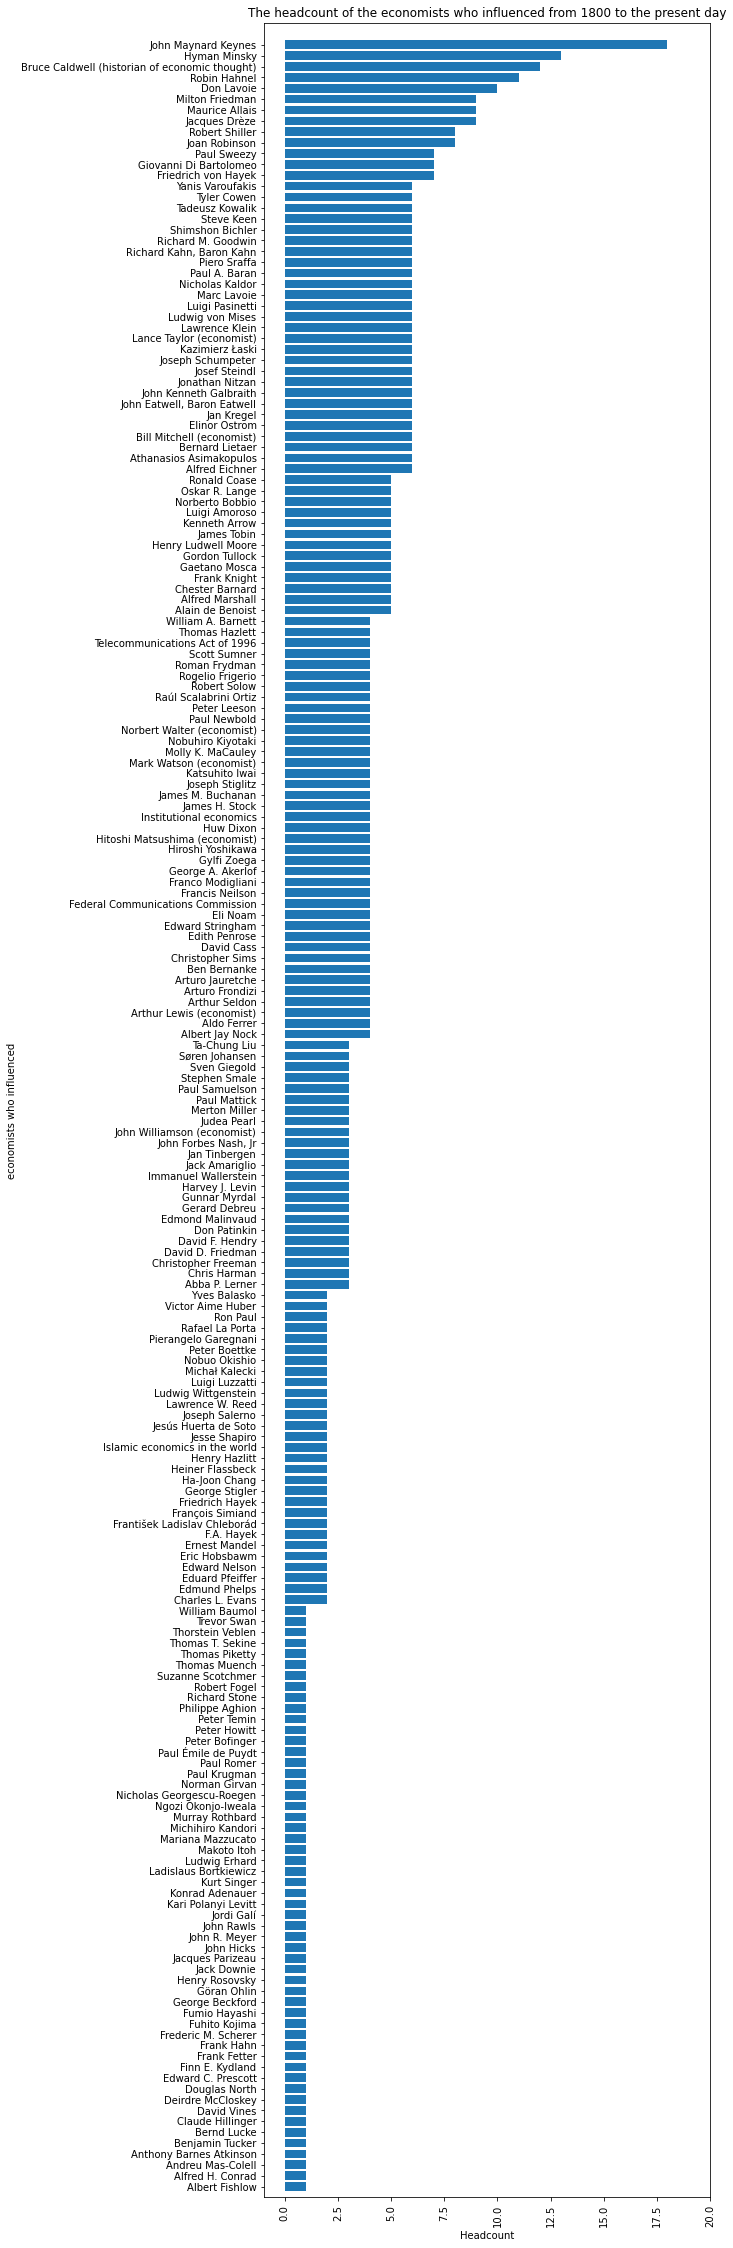

In [193]:
# Barplot of the top 30 of 
eff = [l[1] for l in groupedInfluencedList]
objects = [l[0] for l in groupedInfluencedList]

p1 = plt.barh(eff, objects)

plt.xlabel('Headcount')
plt.ylabel('economists who influenced')
plt.title('The headcount of the economists who influenced from 1800 to the present day')
plt.gcf().set_size_inches(8, 40)
plt.xticks(rotation=45)

p1 = plt.figure(1, [200, 8])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,20)
ax.set_ylim(-1,199)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

In [185]:
counterInfluencedList = Counter(influencedList)
groupedInfluencedList = sorted(list(zip(counterInfluencedList.values(), counterInfluencedList.keys())), reverse=True)

In [186]:
bGIL=groupedInfluencedList[:30]

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


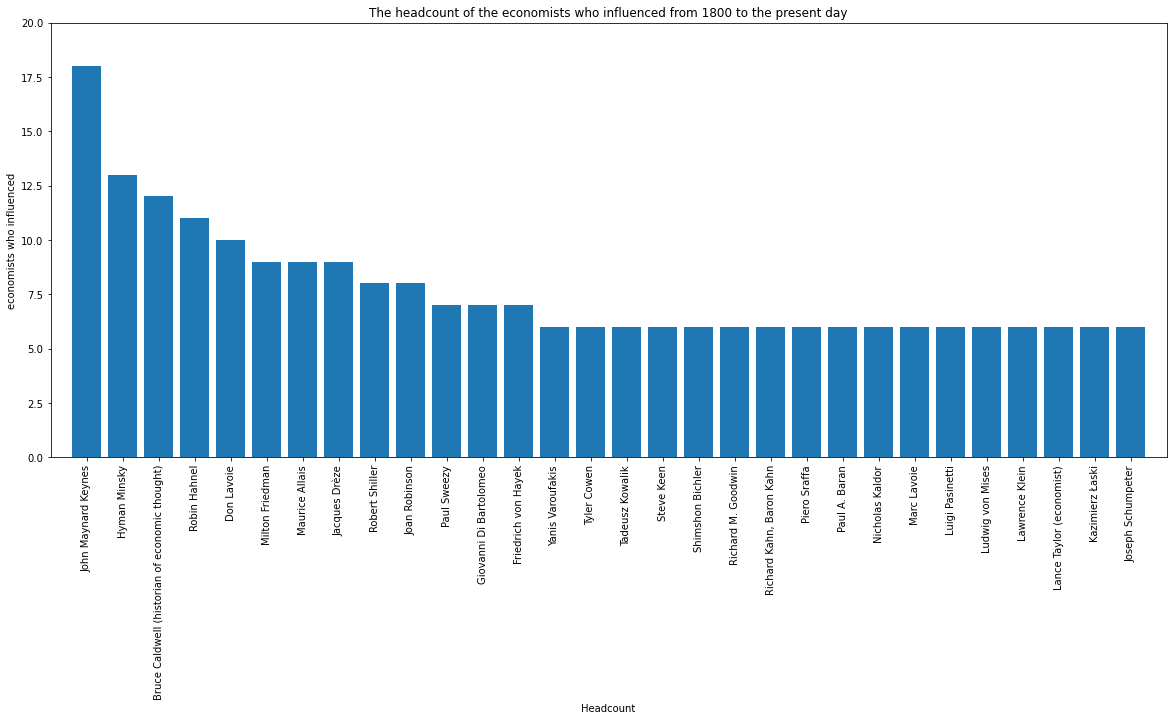

In [187]:
#  Barplot of the top 30 of the economists who influenced from 1800 to the present day
eff = [l[1] for l in bGIL]
objects = [l[0] for l in bGIL]

p1 = plt.bar(eff, objects)

plt.xlabel('Headcount')
plt.ylabel('economists who influenced')
plt.title('The headcount of the economists who influenced from 1800 to the present day')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=45)

p1 = plt.figure(1, [25, 8])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,30)
ax.set_ylim(0,20)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()